<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2020-05-29 18:29:35--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  2.99MB/s    in 1.6s    

2020-05-29 18:29:37 (2.99 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [0]:
!unzip /content/ml-100k

Archive:  /content/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [0]:
path=Path('/content/ml-100k')

In [0]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,names=['user_id','movie_id','rating','timestamp'])                     

In [0]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=['movie_id', 'title', 'date', 'N', 'url',*[f'g{i}' for i in range(19)]])
movies.head()

,movie_id,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
doc(pd.merge)

In [0]:
rating_movie=pd.merge(ratings,movies,how='inner',on=['movie_id'])

In [0]:
rating_movie=rating_movie[['user_id','movie_id','rating','timestamp','title']]

In [0]:
rating_movie.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data=CollabDataBunch.from_df(rating_movie,seed=42,valid_pct=0.1,item_name='title')

In [0]:
data.show_batch()

user_id,title,target
868,Grease (1978),2.0
618,GoldenEye (1995),2.0
621,Rising Sun (1993),4.0
699,Jaws (1975),3.0
655,Foreign Student (1994),2.0


In [0]:
lrn=collab_learner(data,y_range=[0.,5.5],wd=1e-1,n_factors=40)

In [0]:
lrn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


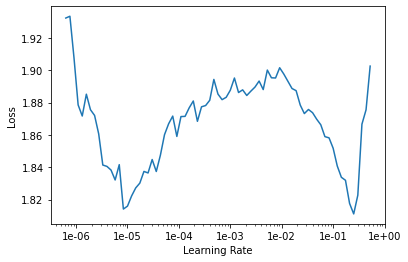

In [0]:
lrn.recorder.plot(skip_end=15)

In [0]:
lrn.fit_one_cycle(20,3e-2)

epoch,train_loss,valid_loss,time
0,0.913476,0.918657,00:08
1,0.890225,0.908410,00:08
2,0.956188,0.963423,00:08
3,1.079521,1.092508,00:08
4,1.143665,1.192128,00:08
5,1.169136,1.201717,00:08
6,1.140853,1.206554,00:08
7,1.232485,1.197599,00:08
8,1.170150,1.184274,00:08
9,1.116317,1.133805,00:08


In [2]:
doc(collab_learner)